In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Inicialización

El primer paso que vamos a realizar es cargar las dos tablas en dos data frames. 

In [2]:
df_volvera = pd.read_csv("tp-2020-2c-train-cols1.csv")
df_volvera

,id_usuario,volveria
0,117,0
1,658,0
2,794,0
3,455,0
4,173,1
...,...,...
796,448,1
797,636,1
798,848,0
799,304,1


In [3]:
df_usuario = pd.read_csv("tp-2020-2c-train-cols2.csv")
df_usuario

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo
...,...,...,...,...,...,...,...,...,...,...,...
796,normal,Señor Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo
797,3d,Señorita Lidia Catalina,636,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo
798,4d,Señor Arturo Antenor,848,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita
799,3d,Señorita Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,adelante,fiumark_quilmes


En un primer analisis, podemos ver de ambas tablas poseen un total de 801 filas, teniendo ambas tablas igual cantidad de valores. 

Para hacer un join de las mismas, vamos a utilizar el campo `id_usuario` el cual es compartido.

Dejaremos en la variable `df_joined` las tablas unidas sin modificar, y usaremos `df` para ir realizando operaciones sobre la misma.

In [4]:
df_joined = df_usuario.join(df_volvera.set_index('id_usuario'), on='id_usuario', how='inner').set_index('id_usuario')
df = df_joined
df

,tipo_de_sala,nombre,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
id_usuario,,,,,,,,,,,
117,4d,Señor Camilo Pedro,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes,0
658,4d,Señora Raquel Angelica,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes,0
794,normal,Señor Antonio Federico,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita,0
455,4d,Señor Osvaldo Aureliano,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo,0
173,4d,Señorita Rita Eudosia,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo,1
...,...,...,...,...,...,...,...,...,...,...,...
448,normal,Señor Bernardo Melesio,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo,1
636,3d,Señorita Lidia Catalina,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo,1
848,4d,Señor Arturo Antenor,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita,0


# Analisis de Datos

## Columnas con ausencia de información

El objetivo de este primer analisis es poder entender cuales son las columnas que poseen faltante de información.

In [37]:
simbols = ["-","","_"]
for c in simbols:
    print("Column has simbol: '",c,"'")
    print(df.astype('str').eq(c).any())

Column has simbol: ' - '
tipo_de_sala     False
nombre           False
genero           False
edad             False
amigos           False
parientes        False
id_ticket        False
precio_ticket    False
fila             False
nombre_sede      False
volveria         False
dtype: bool
Column has simbol: '  '
tipo_de_sala     False
nombre           False
genero           False
edad             False
amigos           False
parientes        False
id_ticket        False
precio_ticket    False
fila             False
nombre_sede      False
volveria         False
dtype: bool
Column has simbol: ' _ '
tipo_de_sala     False
nombre           False
genero           False
edad             False
amigos           False
parientes        False
id_ticket        False
precio_ticket    False
fila             False
nombre_sede      False
volveria         False
dtype: bool


Viendo el resultado anterior, sabemos que no existen caracteres especiales que puedan representar la ausencia de valor distinto a NaN.

A continuación, analizaremos las tablas con valores númericos. En la columna `edad` deberemos considerar como invalido cualquier valor menor o igual a cero. En las otras columnas `amigos` `parientes` `precio_ticket` `volveria` un valor menor a cero sería invalido.

In [6]:
(df['edad'] <= 0).any()

False

In [7]:
columnas_con_numeros = ['amigos', 'parientes', 'precio_ticket', 'volveria']
(df[columnas_con_numeros] < 0).any()

amigos           False
parientes        False
precio_ticket    False
volveria         False
dtype: bool

Por lo visto de analisar la información, no tenemos casos extraños de respuestas que requieran de un analisis especial. Aun sin embargo, nos queda la verificación mas importante que es la de valores en `null`.

In [8]:
df.isnull().sum()

tipo_de_sala       0
nombre             0
genero             0
edad             160
amigos             0
parientes          0
id_ticket          0
precio_ticket      0
fila             624
nombre_sede        2
volveria           0
dtype: int64

Como podemos ver de este ultimo comando, la columna `fila` posee unos 624 nulls de los 801 valores. Adicionalmente, la segunda columna con poca información es la columna edad. A continuación calcularemos el porcentaje de que ausencia de valor de dichas columnas.

In [9]:
(df.isnull().mean()*100).to_frame('porcentaje nulls')

,porcentaje nulls
tipo_de_sala,0.000000
nombre,0.000000
genero,0.000000
edad,19.975031
amigos,0.000000
parientes,0.000000
id_ticket,0.000000
precio_ticket,0.000000
fila,77.902622
nombre_sede,0.249688


Viendo estos valores, podemos observar que en la columna `fila` que representa la fila donde se sento el cliente al ver la pelicula tiene un 78% de ausencia de información. En cuanto a la columna `edad`, encontramos un 20% de faltante de información. 

Es importante mencionar tambien que la columna `nombre_sede` tiene algunos valores en null por lo que deberemos tomar una decisión de que hacer con dichas entradas.

In [35]:
def porcentajeVolveria(unAgrupamiento):
    return (unAgrupamiento == 1).mean() * 100.0

def porcentajeNOVolveria(unAgrupamiento):
    return (unAgrupamiento == 0).mean() * 100.0

df.groupby(by='fila').agg(
    {
        "volveria" : porcentajeVolveria,
        
    }
)

,volveria
fila,
adelante,68.902439
medio,53.846154


In [10]:
#elimino la columna fila de memoria.
df_usuarioClean = df_usuario.drop(columns=['fila'])
df_usuarioClean

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,nombre_sede
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,fiumark_quilmes
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,fiumark_quilmes
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,fiumark_chacarita
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,fiumark_palermo
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,fiumark_palermo
...,...,...,...,...,...,...,...,...,...,...
796,normal,Señor Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,fiumark_palermo
797,3d,Señorita Lidia Catalina,636,mujer,31.0,0,0,45988:,2,fiumark_palermo
798,4d,Señor Arturo Antenor,848,hombre,38.0,0,0,56;435,1,fiumark_chacarita
799,3d,Señorita Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,fiumark_quilmes


In [11]:
#verifico que no modifica nada del archivo original
df_nuevo = pd.read_csv('tp-2020-2c-train-cols2.csv')
df_nuevo

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo
...,...,...,...,...,...,...,...,...,...,...,...
796,normal,Señor Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo
797,3d,Señorita Lidia Catalina,636,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo
798,4d,Señor Arturo Antenor,848,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita
799,3d,Señorita Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,adelante,fiumark_quilmes


In [12]:
# se me ocurre unir ambos DataFrame con el objetivo de poder operar con un único data frame que me permita manejar 
# las distintas variables de df_usuario que hacen a la columna volveria.
df_usuarioClean.set_index('id_usuario')
df_usuarioClean

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,nombre_sede
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,fiumark_quilmes
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,fiumark_quilmes
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,fiumark_chacarita
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,fiumark_palermo
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,fiumark_palermo
...,...,...,...,...,...,...,...,...,...,...
796,normal,Señor Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,fiumark_palermo
797,3d,Señorita Lidia Catalina,636,mujer,31.0,0,0,45988:,2,fiumark_palermo
798,4d,Señor Arturo Antenor,848,hombre,38.0,0,0,56;435,1,fiumark_chacarita
799,3d,Señorita Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,fiumark_quilmes


In [13]:
df_usuarioClean = df_usuarioClean.join(df_volvera.set_index('id_usuario'), on='id_usuario', how='inner').set_index('id_usuario')

In [14]:
df_usuarioClean

,tipo_de_sala,nombre,genero,edad,amigos,parientes,id_ticket,precio_ticket,nombre_sede,volveria
id_usuario,,,,,,,,,,
117,4d,Señor Camilo Pedro,hombre,73.5,0,0,59258;,1,fiumark_quilmes,0
658,4d,Señora Raquel Angelica,mujer,35.0,1,1,586:6;,2,fiumark_quilmes,0
794,normal,Señor Antonio Federico,hombre,NaN,0,0,"RE""39822",3,fiumark_chacarita,0
455,4d,Señor Osvaldo Aureliano,hombre,NaN,0,0,"C17""4:39",1,fiumark_palermo,0
173,4d,Señorita Rita Eudosia,mujer,4.0,1,1,569964,2,fiumark_palermo,1
...,...,...,...,...,...,...,...,...,...,...
448,normal,Señor Bernardo Melesio,hombre,37.0,0,0,3359;6,3,fiumark_palermo,1
636,3d,Señorita Lidia Catalina,mujer,31.0,0,0,45988:,2,fiumark_palermo,1
848,4d,Señor Arturo Antenor,hombre,38.0,0,0,56;435,1,fiumark_chacarita,0


In [15]:
df_usuarioClean.isnull().sum()

tipo_de_sala       0
nombre             0
genero             0
edad             160
amigos             0
parientes          0
id_ticket          0
precio_ticket      0
nombre_sede        2
volveria           0
dtype: int64

In [16]:
df_usuarioClean.loc[df_usuarioClean.volveria == 1].count()

tipo_de_sala     307
nombre           307
genero           307
edad             261
amigos           307
parientes        307
id_ticket        307
precio_ticket    307
nombre_sede      305
volveria         307
dtype: int64

In [17]:
df_usuarioClean.loc[(df_usuarioClean.edad > 25) & (df_usuarioClean.edad < 33) & (df_usuarioClean.volveria == 1)].count()

tipo_de_sala     53
nombre           53
genero           53
edad             53
amigos           53
parientes        53
id_ticket        53
precio_ticket    53
nombre_sede      53
volveria         53
dtype: int64

In [18]:
df_usuarioClean.loc[(df_usuarioClean.edad > 25) & (df_usuarioClean.edad < 33)]

,tipo_de_sala,nombre,genero,edad,amigos,parientes,id_ticket,precio_ticket,nombre_sede,volveria
id_usuario,,,,,,,,,,
91,4d,Señor Carlos Gregorio,hombre,32.0,0,0,565498,1,fiumark_palermo,0
90,4d,Señor Ernesto Reginaldo,hombre,27.0,0,0,565497,1,fiumark_palermo,0
510,4d,Señor Rubens Carlos Randy,hombre,29.0,0,0,3823,6,fiumark_palermo,1
881,3d,Señora Ana Rosa Esilda,mujer,28.0,0,1,452655,3,fiumark_palermo,1
247,4d,Señorita Marta Nilda,mujer,28.0,0,0,569293,1,fiumark_palermo,0
...,...,...,...,...,...,...,...,...,...,...
730,4d,Señorita Josefa Agripina,mujer,28.0,1,0,"UVQP1Q40""5323493",1,fiumark_palermo,0
342,normal,Señorita Leonilda Emilia,mujer,27.0,3,2,3;;72,26,fiumark_palermo,1
76,4d,Señor Rodolfo Hugo,hombre,28.0,0,0,56:345,1,fiumark_palermo,0


In [19]:
df_quilmes = df_usuarioClean.loc[df_usuarioClean.nombre_sede == 'fiumark_quilmes']
df_palermo = df_usuarioClean.loc[df_usuarioClean.nombre_sede == 'fiumark_palermo']
df_chacarita = df_usuarioClean.loc[df_usuarioClean.nombre_sede == 'fiumark_chacarita']
"""
#existen sedes sin nombre, entonces las elimino del data frame original para evitar inconsistencias.
df_usuarioClean.loc[ (df_usuarioClean.nombre_sede != 'fiumark_quilmes') & (df_usuarioClean.nombre_sede != 'fiumark_palermo') & (df_usuarioClean.nombre_sede != 'fiumark_chacarita')]

# al "plotear" el df me salen los nombres de labels principales por id y los borro del df
df_usuarioClean.drop(labels=[830,62], inplace=True)
"""

df_quilmes.loc[df_quilmes.volveria == 1].count() / df_quilmes.count()


tipo_de_sala     0.380282
nombre           0.380282
genero           0.380282
edad             0.307692
amigos           0.380282
parientes        0.380282
id_ticket        0.380282
precio_ticket    0.380282
nombre_sede      0.380282
volveria         0.380282
dtype: float64

In [20]:
df_palermo.loc[df_palermo.volveria == 1].count() / df_palermo.count()

tipo_de_sala     0.336788
nombre           0.336788
genero           0.336788
edad             0.362903
amigos           0.336788
parientes        0.336788
id_ticket        0.336788
precio_ticket    0.336788
nombre_sede      0.336788
volveria         0.336788
dtype: float64

In [21]:
df_chacarita.loc[df_chacarita.volveria == 1].count() / df_chacarita.count()

tipo_de_sala     0.557047
nombre           0.557047
genero           0.557047
edad             0.606838
amigos           0.557047
parientes        0.557047
id_ticket        0.557047
precio_ticket    0.557047
nombre_sede      0.557047
volveria         0.557047
dtype: float64

<AxesSubplot:xlabel='nombre_sede'>

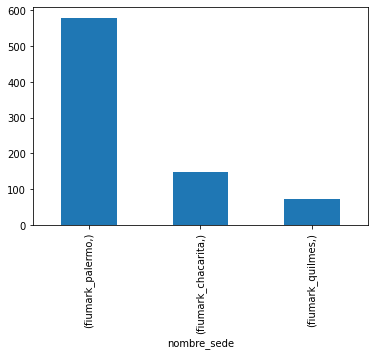

In [22]:
df_usuarioClean[ ['nombre_sede'] ].value_counts().plot(kind='bar')

In [32]:
def porcentajeVolveria(unAgrupamiento):
    return (unAgrupamiento == 1).mean() * 100.0

def porcentajeNOVolveria(unAgrupamiento):
    return (unAgrupamiento == 0).mean() * 100.0

df_agrupados_por_sede = df_usuarioClean.groupby(by='nombre_sede').agg(
    {
        "volveria" : porcentajeVolveria,
    }
)

df_agrupados_por_sede

,volveria
nombre_sede,
fiumark_chacarita,55.704698
fiumark_palermo,33.678756
fiumark_quilmes,38.028169


<AxesSubplot:xlabel='nombre_sede'>

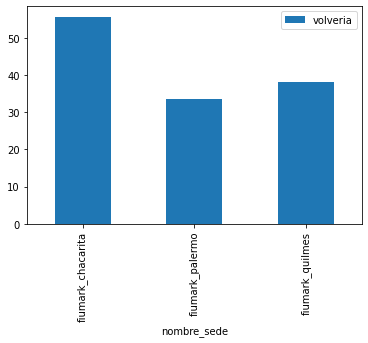

In [33]:
df_agrupados_por_sede.plot(kind = 'bar')

In [24]:
df_agrupados_por_sede = df_usuarioClean.groupby('nombre_sede').agg(list)


arrayNumpy = df_agrupados_por_sede.to_numpy()
hola = np.array(arrayNumpy)


hola[0][1]

['Señor Antonio Federico',
 'Señora Lidia Barbarita',
 'Señora Yolanda Anita',
 'Señor Lorenzo Segundo',
 'Señor Balbino Humberto',
 'Señor Alberto De',
 'Señora Rosa Gabriela',
 'Señor Arturo Mario',
 'Señora Lucinda Imelda',
 'Señorita Ramona Escobares',
 'Señor Silvino',
 'Señor Agustin Ruperto',
 'Señorita America Palmira',
 'Señora Antonia Negilda',
 'Señor Inocencio Atanasio',
 'Señor Segundo José',
 'Señor Juan Martin',
 'Señora Juana Ceriaca',
 'Señorita Felisa Eduarda',
 'Señor Fortunato Saul',
 'Señor Juan Aquilino',
 'Señor Celso Hector',
 'Señorita Juana Pura',
 'Señor David Edelmiro',
 'Señora Benigna Clotilde',
 'Señor Pedro Dionisio',
 'Señor Ernesto Gustavo',
 'Señorita Julia Domiciana',
 'Señor Elidio Santiago',
 'Señor Juan Dalmiro',
 'Señora Elsa Rosalia',
 'Señor Jacinto Pedro',
 'Señora Fermina Eugenia',
 'Señor Clemente Hugo',
 'Señor Leonardo Ramon',
 'Señor Fernando Lorenzo Martin',
 'Señor Marcos German',
 'Señorita Margarita Betsabe',
 'Señor Salvador Ramón',


### Analizo otras variables que se me ocurren: Ir con amigos y/o familiares

In [25]:
df_usuarioClean.loc[(df_usuarioClean.genero == 'mujer') & (df_usuarioClean.volveria == 0)]

,tipo_de_sala,nombre,genero,edad,amigos,parientes,id_ticket,precio_ticket,nombre_sede,volveria
id_usuario,,,,,,,,,,
658,4d,Señora Raquel Angelica,mujer,35.0,1,1,586:6;,2,fiumark_quilmes,0
230,4d,Señorita Anselma Josefina,mujer,NaN,3,1,6355,3,fiumark_palermo,0
768,4d,Señorita Lucía Elba,mujer,33.5,0,0,586:72,1,fiumark_quilmes,0
855,3d,Señora Carmen Greunisia,mujer,47.0,1,0,466474,3,fiumark_palermo,0
247,4d,Señorita Marta Nilda,mujer,28.0,0,0,569293,1,fiumark_palermo,0
...,...,...,...,...,...,...,...,...,...,...
504,4d,Señorita Jacinta Olga,mujer,40.0,0,0,6357,1,fiumark_palermo,0
41,4d,Señora Elva Blanca,mujer,43.0,1,0,9768,1,fiumark_palermo,0
730,4d,Señorita Josefa Agripina,mujer,28.0,1,0,"UVQP1Q40""5323493",1,fiumark_palermo,0


### Agrupo entonces por Hombre y Mujer y ploteo los porcentajes de volver de cada genero.

In [26]:
df_usuarios_porGenero = df_usuarioClean.groupby(by=['genero']).agg(
    {
        'volveria' : porcentajeVolveria
    }
)

#df_usuarios_porGenero['no volveria'] = df_usuarios_porGenero['volveria'].apply(porcentajeNOVolveria)

df_usuarios_porGenero['no volveria'] = df_usuarioClean.groupby(by=['genero']).agg(
    {
        'volveria' : porcentajeNOVolveria
    }
)

df_usuarios_porGenero

,volveria,no volveria
genero,,
hombre,18.323587,81.676413
mujer,73.958333,26.041667


### Me fijo cuanta accuracy tenemos sin hacer ninguna partición

In [27]:
from sklearn.metrics import accuracy_score

#observo que la mayoría no vuelve.
pred = [1] * len(df_usuarioClean)
accuracy_score(df_usuarioClean.volveria, pred)

0.383270911360799

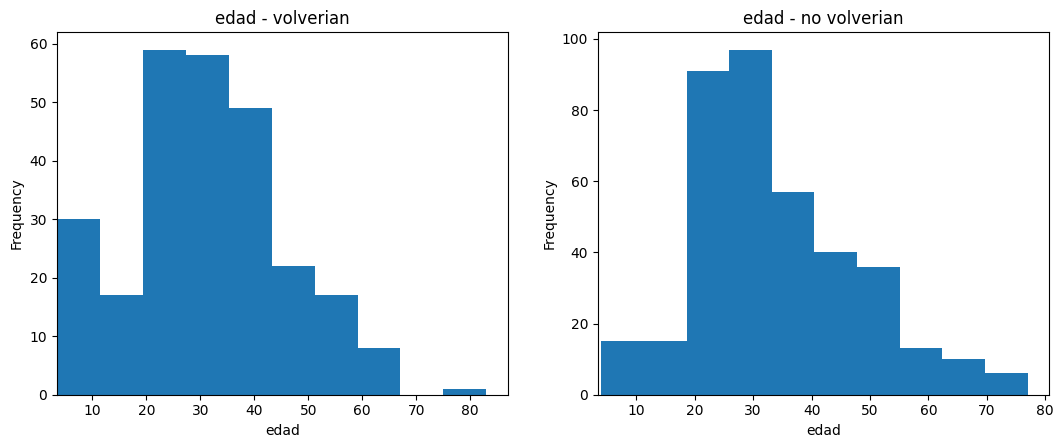

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2 , 4.8], dpi=100)

df_usuario_volvera = df_usuarioClean[ df_usuarioClean.volveria == 1 ]

df_usuario_no_volvera = df_usuarioClean[ df_usuarioClean.volveria == 0 ]

df_usuario_volvera.edad.plot(kind = 'hist', ax=axes[0], xlim=df_usuarioClean.edad.min())

df_usuario_no_volvera.edad.plot(kind = 'hist', ax=axes[1], xlim=df_usuarioClean.edad.min())

axes[0].set_title("edad - volverian")
axes[0].set_xlabel("edad")

axes[1].set_title("edad - no volverian")
axes[1].set_xlabel("edad")

plt.show()


In [29]:
import seaborn as sns

plt.figure(dpi=100)
sns.countplot(data=df_usuarioClean, x='precio_ticket', hue='volveria')

plt.title("Cantidad por Precio de Ticket")import seaborn as sns

plt.figure(dpi=100)
sns.countplot(data=df_usuarioClean, x='precio_ticket', hue='volveria')

plt.title("Cantidad por Precio de Ticket")

SyntaxError: invalid syntax (<ipython-input-29-70c7a6fd41d3>, line 6)

In [ ]:
import seaborn as sns

plt.figure(dpi=100)
sns.countplot(data=df_usuarioClean, x='tipo_de_sala', hue='volveria')

plt.title("Cantidad por Tipo de Sala")

In [ ]:
df_usuarioClean[(df_usuarioClean.nombre_sede == 'fiumark_palermo') & 
                (df_usuarioClean.tipo_de_sala == '4d') & 
                (df_usuarioClean.genero == 'hombre') & 
                (df_usuarioClean.volveria == 1)]

In [ ]:
df_usuarioClean[(df_usuarioClean.nombre_sede == 'fiumark_palermo') & 
                (df_usuarioClean.tipo_de_sala == '4d') & 
                (df_usuarioClean.genero == 'mujer') & 
                (df_usuarioClean.volveria == 1)]